In [1]:
import tensorflow
import keras 

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_train = pd.read_csv('Dataset/Train.csv')
data_test = pd.read_csv('Dataset/Test.csv')

In [4]:
data_train.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,...,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,...,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [6]:
data_train.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [7]:
data_test.isna().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [8]:
data_train["Age"].fillna(data_train["Age"].median(),inplace=True)
data_train["Time_of_service"].fillna(data_train["Time_of_service"].median(),inplace=True)
data_train['Pay_Scale'].fillna(data_train["Pay_Scale"].median(),inplace=True)
data_train["Work_Life_balance"].fillna(data_train["Work_Life_balance"].median(),inplace=True)
data_train["VAR2"].fillna(data_train["VAR2"].median(),inplace=True)
data_train["VAR4"].fillna(data_train["VAR4"].median(),inplace=True)

In [9]:
data_test["Age"].fillna(data_test["Age"].median(),inplace=True)
data_test["Time_of_service"].fillna(data_test["Time_of_service"].median(),inplace=True)
data_test['Pay_Scale'].fillna(data_test["Pay_Scale"].median(),inplace=True)
data_test["Work_Life_balance"].fillna(data_test["Work_Life_balance"].median(),inplace=True)
data_test["VAR2"].fillna(data_test["VAR2"].median(),inplace=True)
data_test["VAR4"].fillna(data_test["VAR4"].median(),inplace=True)

In [10]:
data_train.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [11]:
data_test.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

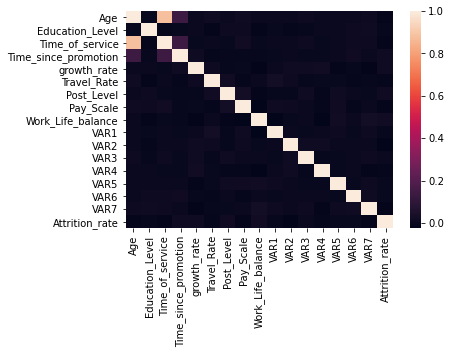

In [13]:
sns.heatmap(data_train.corr())

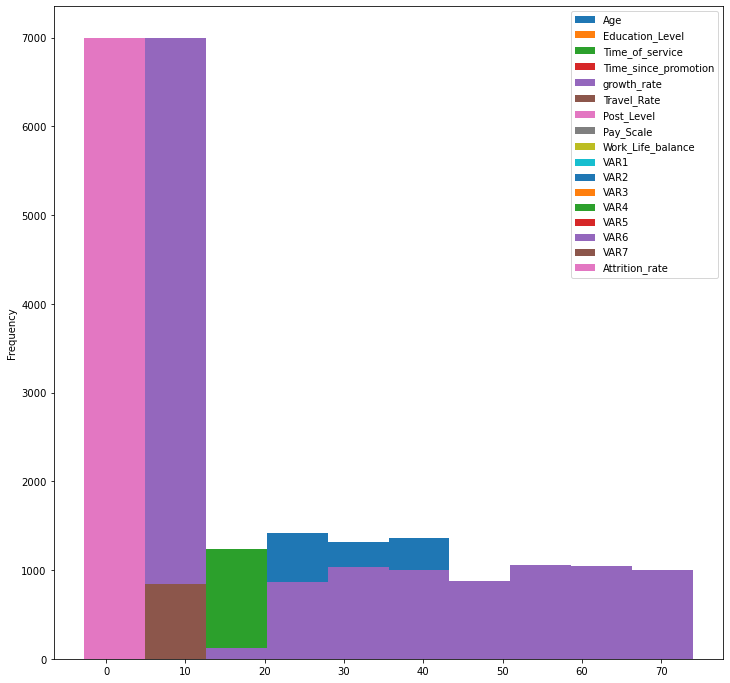

In [14]:
data_train.plot(kind='hist',figsize=(12,12))

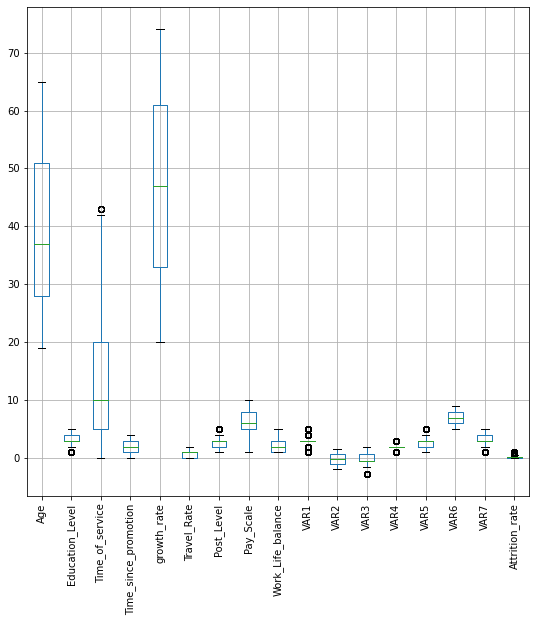

In [15]:
data_train.boxplot(figsize=(9,9),rot=90)

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
le_1 = LabelEncoder()
le_4 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_7 = LabelEncoder()
le_14 = LabelEncoder()
ohe = OneHotEncoder(categories = 'auto',handle_unknown = 'ignore')

data_train['Gender'] = le_1.fit_transform(data_train['Gender'])
data_train['Relationship_Status'] = le_4.fit_transform(data_train['Relationship_Status'])
data_train['Hometown'] = le_5.fit_transform(data_train['Hometown'])
data_train['Unit'] = le_6.fit_transform(data_train['Unit'])
data_train['Decision_skill_possess'] = le_7.fit_transform(data_train['Decision_skill_possess'])
data_train['Compensation_and_Benefits'] = le_14.fit_transform(data_train['Compensation_and_Benefits'])

In [18]:
data_test['Gender'] = le_1.transform(data_test['Gender'])
data_test['Relationship_Status'] = le_4.transform(data_test['Relationship_Status'])
data_test['Hometown'] = le_5.transform(data_test['Hometown'])
data_test['Unit'] = le_6.transform(data_test['Unit'])
data_test['Decision_skill_possess'] = le_7.transform(data_test['Decision_skill_possess'])
data_test['Compensation_and_Benefits'] = le_14.transform(data_test['Compensation_and_Benefits'])

In [19]:
x = data_train.iloc[:,1:23]
y = data_train['Attrition_rate'].values

In [20]:
data_test = data_test.iloc[:,1:]

In [21]:
x = ohe.fit_transform(x)
data_test = ohe.transform(data_test)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [24]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from livelossplot  import PlotLossesKeras
from keras.callbacks import ModelCheckpoint

In [25]:
callback = [ModelCheckpoint('tmp_weights/epoch_{epoch:02d}_acc_{val_accuracy:.4f}',
                           save_weights_only=True,
                           save_best_only=True,
                           monitor='val_accuracy'),
           PlotLossesKeras()]

In [26]:
model = Sequential()

model.add(Dense(80,input_dim=242,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                19440     
_________________________________________________________________
dense_2 (Dense)              (None, 160)               12960     
_________________________________________________________________
dense_3 (Dense)              (None, 160)               25760     
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                4830      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 63,021
Trainable params: 63,021
Non-trainable params: 0
__________________________________________________

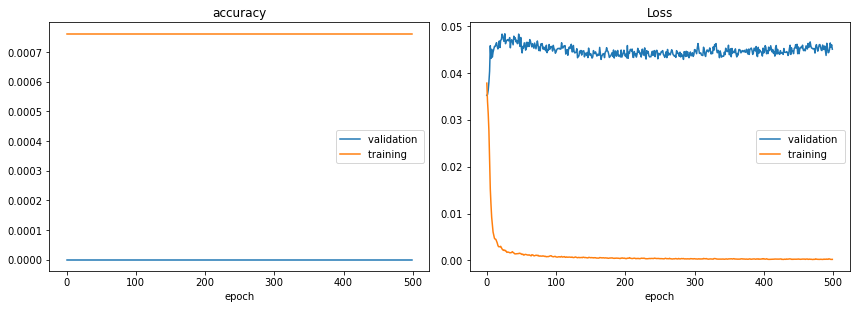

accuracy
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
	training         	 (min:    0.001, max:    0.001, cur:    0.001)
Loss
	validation       	 (min:    0.035, max:    0.048, cur:    0.045)
	training         	 (min:    0.000, max:    0.038, cur:    0.000)


In [27]:
model.fit(x_train,y_train,
         validation_data=(x_test,y_test),
         epochs=500,
         batch_size = 30, 
         callbacks=callback)

In [29]:
model.save("model_h5/model.h5")

In [30]:
model_json = model.to_json()

with open("model.json",'w') as file:
    file.write(model_json)  


In [31]:
y_pred = model.predict(data_test)

In [47]:
y_pred


array([[0.3018951 ],
       [0.15314075],
       [0.20946452],
       ...,
       [0.03961538],
       [0.11534944],
       [0.2562303 ]], dtype=float32)

In [44]:
y_pred1 = list(map(list,y_pred))

In [50]:
import csv

head = ['Attrition_rate']

In [64]:
with open("Submission.csv",'w',newline='') as file:
    csvwriter = csv.writer(file)
    csvwriter.writerow(head)
    for i in y_pred1:
        csvwriter.writerow(i)